In [152]:
#Importing Essentially Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [153]:
#Setting the relative path to the dataset
import os
file_path = os.path.join('..','datasets','Algerian_forest_fires_dataset.csv')
print(file_path)

..\datasets\Algerian_forest_fires_dataset.csv


In [154]:
#checking the current working directory
print(os.getcwd())

e:\2025\algerian_forest_fire\notebooks


In [155]:
#Reading the csv file
df = pd.read_csv(file_path)

In [156]:
df.head()

,,,,,,,,,,,,,Bejaia Region Dataset
day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire


In [157]:
new_header = df.iloc[0]

In [158]:
new_header

Bejaia Region Dataset     Classes  
Name: (day, month, year, Temperature,  RH,  Ws, Rain , FFMC, DMC, DC, ISI, BUI, FWI), dtype: object

In [159]:
new_header = new_header.name

In [160]:
new_header

('day',
 'month',
 'year',
 'Temperature',
 ' RH',
 ' Ws',
 'Rain ',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI')

In [161]:
df = df.iloc[1:]

In [162]:
df.head()

,,,,,,,,,,,,,Bejaia Region Dataset
01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [163]:
df.columns = new_header

ValueError: Length mismatch: Expected axis has 1 elements, new values have 13 elements

In [164]:
df.shape

(246, 1)

In [165]:
df.columns

Index(['Bejaia Region Dataset '], dtype='object')

In [166]:
row = df.iloc[90]

In [167]:
row

Bejaia Region Dataset     not fire   
Name: (30, 08, 2012, 35, 70, 17, 0.8, 72.7, 25.2, 180.4, 1.7, 37.4, 4.2), dtype: object

In [168]:
row.name

('30',
 '08',
 '2012',
 '35',
 '70',
 '17',
 '0.8',
 '72.7',
 '25.2',
 '180.4',
 '1.7',
 '37.4',
 '4.2')

In [169]:
type(row.name)

tuple

In [170]:
datalist = []
for index,row in df.iterrows():
    datalist.append(row.name)

In [171]:
datalist[2]

('03',
 '06',
 '2012',
 '26',
 '82',
 '22',
 '13.1',
 '47.1',
 '2.5',
 '7.1',
 '0.3',
 '2.7',
 '0.1')

In [172]:
dataset = pd.DataFrame(datalist,columns=new_header)

In [173]:
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5


In [174]:
fire_data = []

In [175]:
for index,row in df.iterrows():
    if ('not fire' in str(row)):
        fire_data.append(0)
    else:
        fire_data.append(1)

In [176]:
dataset['Classes'] = fire_data

In [177]:
dataset.head(10)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,0
5,06,06,2012,31,67,14,0,82.6,5.8,22.2,3.1,7,2.5,1
6,07,06,2012,33,54,13,0,88.2,9.9,30.5,6.4,10.9,7.2,1
7,08,06,2012,30,73,15,0,86.6,12.1,38.3,5.6,13.5,7.1,1
8,09,06,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,0
9,10,06,2012,28,79,12,0,73.2,9.5,46.3,1.3,12.6,0.9,0


In [178]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      246 non-null    int64 
dtypes: int64(1), object(13)
memory usage: 27.0+ KB


In [179]:
# Data Cleaning
# Checking missing data
dataset[dataset.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


The dataset is converted into two sets based on Region from 122th index, we can make a new column based on the Region

1 : "Bejaia Region Dataset"

2 : "Sidi-Bel Abbes Region Dataset"

Add new column with region

In [181]:
dataset.iloc[119:126]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
119,28,09,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,0
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,0
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,0
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,1
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,0
125,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,0


In [182]:
dataset.loc[:122, "Region"] = 0
dataset.loc[122:, "Region"] = 1

In [183]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      246 non-null    int64  
 14  Region       246 non-null    float64
dtypes: float64(1), int64(1), object(13)
memory usage: 29.0+ KB


In [184]:
dataset.loc[122]

day            Sidi-Bel Abbes Region Dataset
month                                    NaN
year                                     NaN
Temperature                              NaN
 RH                                      NaN
 Ws                                      NaN
Rain                                     NaN
FFMC                                     NaN
DMC                                      NaN
DC                                       NaN
ISI                                      NaN
BUI                                      NaN
FWI                                      NaN
Classes                                    1
Region                                   1.0
Name: 122, dtype: object

In [187]:
dataset[dataset.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1.0


In [188]:
#removing the null values and renaming df
df = dataset.dropna().reset_index(drop=True)

In [189]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,0,0.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,0,0.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,0,0.0


In [190]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [191]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [192]:
#Fixing column names
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          245 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4   RH           245 non-null    object 
 5   Ws           245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      245 non-null    int64  
 14  Region       245 non-null    float64
dtypes: float64(1), int64(1), object(13)
memory usage: 28.8+ KB


In [194]:
#Fixing the datatypes
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,0,0.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,0,0.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,0,0.0


In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          245 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4   RH           245 non-null    object 
 5   Ws           245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      245 non-null    int64  
 14  Region       245 non-null    float64
dtypes: float64(1), int64(1), object(13)
memory usage: 28.8+ KB


In [196]:
row = df.loc[0, 'day']

In [197]:
row

'01'

In [198]:
type(row)

str

In [199]:
int_day = int(row)

In [200]:
int_day

1

In [201]:
df['day_num'] = pd.to_numeric(df['day'])

ValueError: Unable to parse string "day" at position 122

In [202]:
df.loc[122]

day                    day
month                month
year                  year
Temperature    Temperature
RH                      RH
Ws                      Ws
Rain                 Rain 
FFMC                  FFMC
DMC                    DMC
DC                      DC
ISI                    ISI
BUI                    BUI
FWI                    FWI
Classes                  1
Region                 1.0
Name: 122, dtype: object

In [203]:
df.loc[123]

day              01
month            06
year           2012
Temperature      32
RH               71
Ws               12
Rain            0.7
FFMC           57.1
DMC             2.5
DC              8.2
ISI             0.6
BUI             2.8
FWI             0.2
Classes           0
Region          1.0
Name: 123, dtype: object

In [204]:
#droping 122th row
df = df.drop(121).reset_index(drop=True)

In [205]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,0,0.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,0,0.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,0,0.0


In [206]:
df_num = df.astype(float)

ValueError: could not convert string to float: 'day'

In [207]:
df['day_num'] = pd.to_numeric(df['day'])

ValueError: Unable to parse string "day" at position 121

In [208]:
df.iloc[121]

day                    day
month                month
year                  year
Temperature    Temperature
RH                      RH
Ws                      Ws
Rain                 Rain 
FFMC                  FFMC
DMC                    DMC
DC                      DC
ISI                    ISI
BUI                    BUI
FWI                    FWI
Classes                  1
Region                 1.0
Name: 121, dtype: object

In [209]:
df= df.drop(121).reset_index(drop=True)

In [210]:
df['day_num'] = pd.to_numeric(df['day'])

In [211]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,day_num
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0,1
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,0,0.0,2
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0,3
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,0,0.0,4
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,0,0.0,5


In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    object 
 1   month        243 non-null    object 
 2   year         243 non-null    object 
 3   Temperature  243 non-null    object 
 4   RH           243 non-null    object 
 5   Ws           243 non-null    object 
 6   Rain         243 non-null    object 
 7   FFMC         243 non-null    object 
 8   DMC          243 non-null    object 
 9   DC           243 non-null    object 
 10  ISI          243 non-null    object 
 11  BUI          243 non-null    object 
 12  FWI          243 non-null    object 
 13  Classes      243 non-null    int64  
 14  Region       243 non-null    float64
 15  day_num      243 non-null    int64  
dtypes: float64(1), int64(2), object(13)
memory usage: 30.5+ KB


In [213]:
df = df.astype(float)

ValueError: could not convert string to float: '14.6 9'

In [214]:
df[['month','day','year','Temperature','RH','Ws']]=df[['month','day','year','Temperature','RH','Ws']].astype(int)

In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    object 
 7   FFMC         243 non-null    object 
 8   DMC          243 non-null    object 
 9   DC           243 non-null    object 
 10  ISI          243 non-null    object 
 11  BUI          243 non-null    object 
 12  FWI          243 non-null    object 
 13  Classes      243 non-null    int64  
 14  Region       243 non-null    float64
 15  day_num      243 non-null    int64  
dtypes: float64(1), int32(6), int64(2), object(7)
memory usage: 24.8+ KB


In [216]:
#changing others to float
obj_columns = [columns for columns in df.columns if df[columns].dtypes=='O']

In [217]:
obj_columns

['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

In [218]:
for i in obj_columns:
    df[i] = df[i].astype(float)

ValueError: could not convert string to float: '14.6 9'

In [219]:
df.loc[119:125]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,day_num
119,28,9,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,0,0.0,28
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,0,0.0,29
121,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,0,1.0,1
122,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,0,1.0,2
123,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,0,1.0,3
124,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1,0,1.0,4
125,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,0,1.0,5


In [220]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,day_num
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1.0,26
239,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,0,1.0,27
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1.0,28
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1.0,29
242,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1.0,30


In [221]:
matching_rows = df[(df == "14.6 9").any(axis=1)]

In [222]:
matching_rows

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,day_num
164,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,1,1.0,14


In [223]:
df.loc[161:168]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,day_num
161,11,7,2012,34,56,15,2.9,74.8,7.1,9.5,1.6,6.8,0.8,0,1.0,11
162,12,7,2012,36,44,13,0.0,90.1,12.6,19.4,8.3,12.5,9.6,1,1.0,12
163,13,7,2012,39,45,13,0.6,85.2,11.3,10.4,4.2,10.9,4.7,1,1.0,13
164,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,1,1.0,14
165,15,7,2012,34,45,17,0.0,90.5,18.0,24.1,10.9,17.7,14.1,1,1.0,15
166,16,7,2012,31,83,17,0.0,84.5,19.4,33.1,4.7,19.2,7.3,1,1.0,16
167,17,7,2012,32,81,17,0.0,84.6,21.1,42.3,4.7,20.9,7.7,1,1.0,17
168,18,7,2012,33,68,15,0.0,86.1,23.9,51.6,5.2,23.9,9.1,1,1.0,18


In [224]:
#droping the error row
df = df.drop(164).reset_index(drop=True)

In [225]:
df.loc[161:168]


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,day_num
161,11,7,2012,34,56,15,2.9,74.8,7.1,9.5,1.6,6.8,0.8,0,1.0,11
162,12,7,2012,36,44,13,0.0,90.1,12.6,19.4,8.3,12.5,9.6,1,1.0,12
163,13,7,2012,39,45,13,0.6,85.2,11.3,10.4,4.2,10.9,4.7,1,1.0,13
164,15,7,2012,34,45,17,0.0,90.5,18.0,24.1,10.9,17.7,14.1,1,1.0,15
165,16,7,2012,31,83,17,0.0,84.5,19.4,33.1,4.7,19.2,7.3,1,1.0,16
166,17,7,2012,32,81,17,0.0,84.6,21.1,42.3,4.7,20.9,7.7,1,1.0,17
167,18,7,2012,33,68,15,0.0,86.1,23.9,51.6,5.2,23.9,9.1,1,1.0,18
168,19,7,2012,34,58,16,0.0,88.1,27.8,61.1,7.3,27.7,13,1,1.0,19


In [226]:
for i in obj_columns:
    df[i] = df[i].astype(float)

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          242 non-null    int32  
 1   month        242 non-null    int32  
 2   year         242 non-null    int32  
 3   Temperature  242 non-null    int32  
 4   RH           242 non-null    int32  
 5   Ws           242 non-null    int32  
 6   Rain         242 non-null    float64
 7   FFMC         242 non-null    float64
 8   DMC          242 non-null    float64
 9   DC           242 non-null    float64
 10  ISI          242 non-null    float64
 11  BUI          242 non-null    float64
 12  FWI          242 non-null    float64
 13  Classes      242 non-null    int64  
 14  Region       242 non-null    float64
 15  day_num      242 non-null    int64  
dtypes: float64(8), int32(6), int64(2)
memory usage: 24.7 KB


In [229]:
#cleaning test columns
df = df.drop('day_num',axis=1)

KeyError: "['day_num'] not found in axis"

In [230]:
df['Region'] = df['Region'].astype(int)

In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          242 non-null    int32  
 1   month        242 non-null    int32  
 2   year         242 non-null    int32  
 3   Temperature  242 non-null    int32  
 4   RH           242 non-null    int32  
 5   Ws           242 non-null    int32  
 6   Rain         242 non-null    float64
 7   FFMC         242 non-null    float64
 8   DMC          242 non-null    float64
 9   DC           242 non-null    float64
 10  ISI          242 non-null    float64
 11  BUI          242 non-null    float64
 12  FWI          242 non-null    float64
 13  Classes      242 non-null    int64  
 14  Region       242 non-null    int32  
dtypes: float64(7), int32(7), int64(1)
memory usage: 21.9 KB


In [232]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [233]:
df.shape

(242, 15)

In [234]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
count,242.000000,242.000000,242.0,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,15.702479,7.495868,2012.0,32.181818,61.975207,15.500000,0.760331,77.978099,14.733471,49.604132,4.761157,16.749587,7.064050,0.566116,0.500000
std,8.813084,1.112912,0.0,3.606127,14.823141,2.815561,2.006937,14.222254,12.391293,47.687649,4.152505,14.228040,7.442537,0.496637,0.501036
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.250000,14.000000,0.000000,72.375000,5.800000,14.325000,1.400000,6.025000,0.725000,0.000000,0.000000
50%,16.000000,7.500000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.250000,3.500000,12.450000,4.450000,1.000000,0.500000
75%,23.000000,8.000000,2012.0,35.000000,73.000000,17.000000,0.500000,88.300000,20.850000,70.050000,7.275000,22.775000,11.525000,1.000000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000,1.000000


In [235]:
#Saving the cleaned dataset
clean_path = os.path.join("..","datasets","Algerian_fire_cleaned.csv")
df.to_csv(clean_path,index=False)

In [236]:
os.getcwd()

'e:\\2025\\algerian_forest_fire\\notebooks'

In [237]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [238]:
#EDA
#droping redundant columns
eda_df = df.drop(['day','month','year'],axis=1)

In [239]:
eda_df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


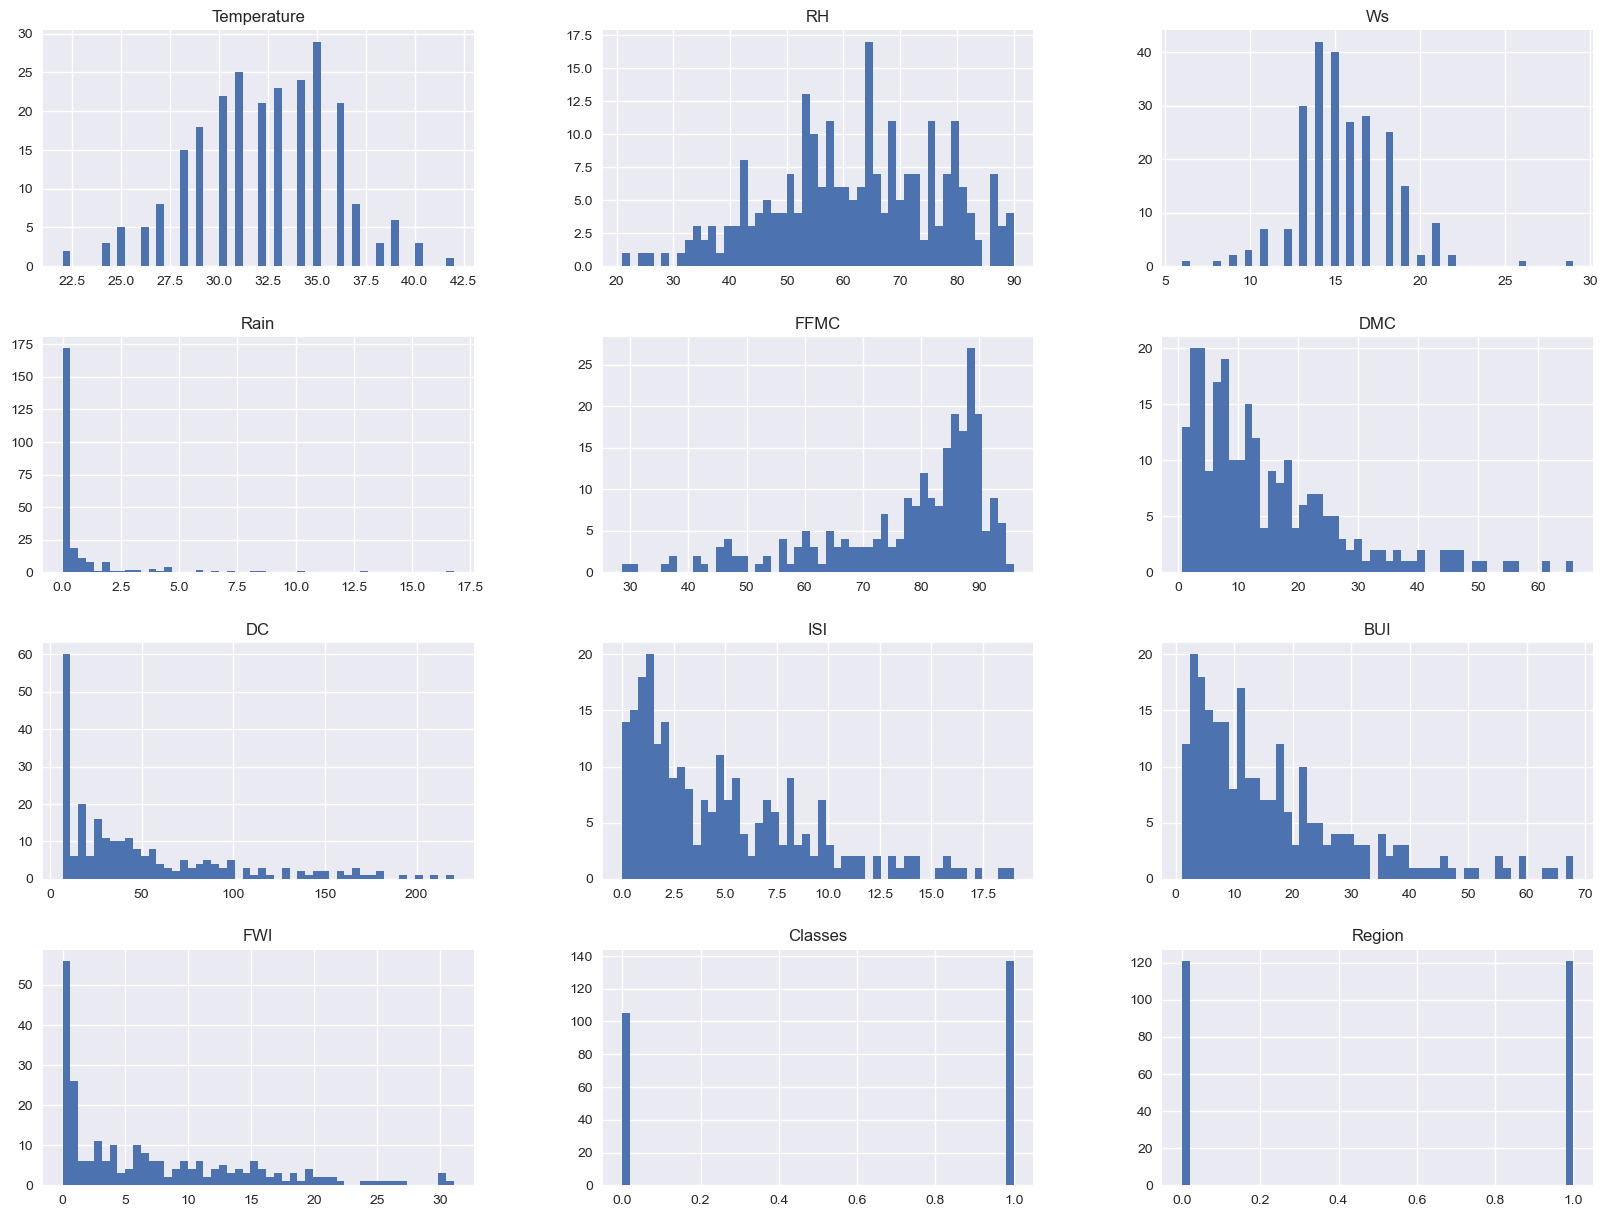

In [240]:
#ploting 
plt.style.use('seaborn')
eda_df.hist(bins=50,figsize=(20,15))
plt.show()


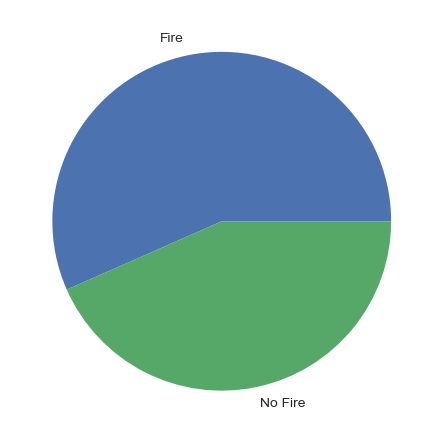

In [241]:
#Piechart
perc = eda_df['Classes'].value_counts(normalize=True)*100
plt.pie(perc,labels=["Fire","No Fire"])
plt.show()

In [242]:
#Correlation
eda_df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.649404,-0.291385,-0.326603,0.670543,0.482212,0.372699,0.601275,0.456215,0.564627,0.512241,0.264101
RH,-0.649404,1.000000,0.247160,0.221515,-0.643212,-0.405784,-0.223910,-0.685130,-0.350933,-0.579230,-0.429272,-0.400024
Ws,-0.291385,0.247160,1.000000,0.172344,-0.173592,-0.003003,0.077365,0.006140,0.029303,0.030385,-0.072702,-0.183835
Rain,-0.326603,0.221515,0.172344,1.000000,-0.546977,-0.288109,-0.297402,-0.346975,-0.299216,-0.323844,-0.378692,-0.038789
FFMC,0.670543,-0.643212,-0.173592,-0.546977,1.000000,0.601704,0.505368,0.739520,0.590144,0.691065,0.769157,0.215596
DMC,0.482212,-0.405784,-0.003003,-0.288109,0.601704,1.000000,0.875498,0.678958,0.982173,0.875385,0.583649,0.188639
DC,0.372699,-0.223910,0.077365,-0.297402,0.505368,0.875498,1.000000,0.506723,0.941806,0.738636,0.509160,-0.082664
ISI,0.601275,-0.685130,0.006140,-0.346975,0.739520,0.678958,0.506723,1.000000,0.642474,0.922618,0.733830,0.259865
BUI,0.456215,-0.350933,0.029303,-0.299216,0.590144,0.982173,0.941806,0.642474,1.000000,0.857429,0.584697,0.085621
FWI,0.564627,-0.579230,0.030385,-0.323844,0.691065,0.875385,0.738636,0.922618,0.857429,1.000000,0.718040,0.194006


In [243]:
import seaborn as sns

<AxesSubplot:>

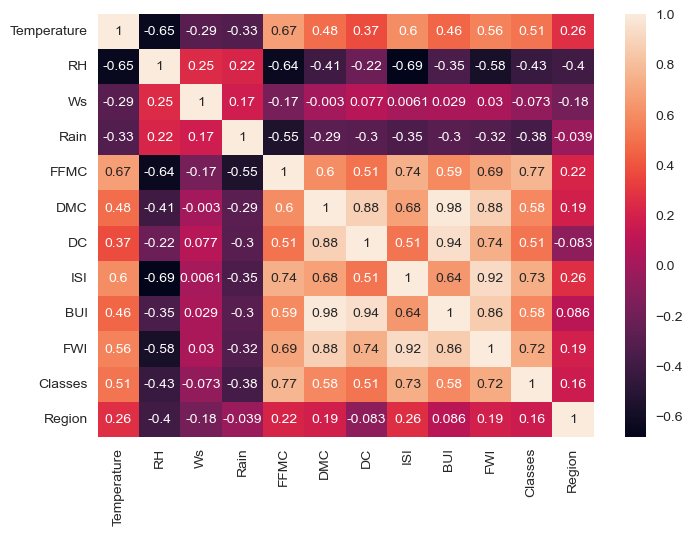

In [244]:
sns.heatmap(eda_df.corr(),annot=True)

Text(0.5, 1.0, 'Sidi-Bel Region')

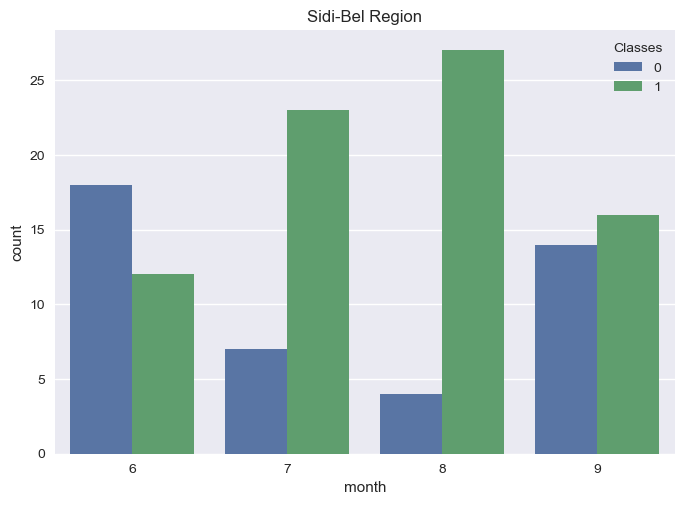

In [245]:
# Monthly Fire analysis. We use df instead of eda_df
#for Sidi bel region
temp_df = df.loc[df['Region']==1]
sns.countplot(x='month', hue='Classes',data=temp_df)
plt.title("Sidi-Bel Region")


Text(0.5, 1.0, 'Sidi-Bel Region')

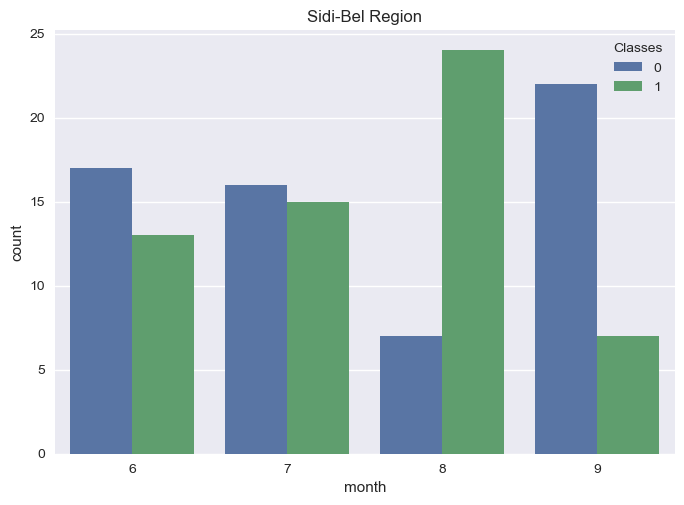

In [246]:
#for Brjaia region
temp_df = df.loc[df['Region']==0]
sns.countplot(x='month', hue='Classes',data=temp_df)
plt.title("Sidi-Bel Region")
